In [3]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Importing the dataset
from tensorflow.keras.datasets import mnist

In [9]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


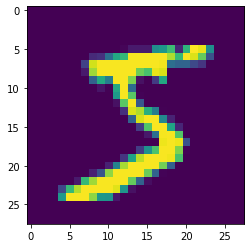

In [10]:
plt.imshow(x_train[0])

In [11]:
y_train[0]

5

In [12]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [13]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [14]:
x_train.min(), x_train.max()

(0, 255)

In [15]:
y_train.min(), y_train.max()

(0, 9)

In [16]:
# normalize the images
x_train = x_train/255.0
x_test = x_test/255.0

In [17]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [18]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
# reshape the images
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [20]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [21]:
input_shape = x_train[0].shape

In [22]:
print(input_shape)

(28, 28, 1)


# Step 3: Building the Model

In [23]:
# define an object
model = tf.keras.models.Sequential()

In [24]:
# Adding first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))

# Adding second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))

# addding flatten layer
model.add(tf.keras.layers.Flatten())

# fully connected layer (dense layer)
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Step 4: Training the model

In [27]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 57s 952us/sample - loss: 0.1631 - sparse_categorical_accuracy: 0.9516 - val_loss: 0.0559 - val_sparse_categorical_accuracy: 0.9823
Epoch 2/10
60000/60000 [==============================] - 55s 924us/sample - loss: 0.0525 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0391 - val_sparse_categorical_accuracy: 0.9868
Epoch 3/10
60000/60000 [==============================] - 55s 915us/sample - loss: 0.0370 - sparse_categorical_accuracy: 0.9884 - val_loss: 0.0291 - val_sparse_categorical_accuracy: 0.9899
Epoch 4/10
60000/60000 [==============================] - 54s 905us/sample - loss: 0.0277 - sparse_categorical_accuracy: 0.9909 - val_loss: 0.0380 - val_sparse_categorical_accuracy: 0.9880
Epoch 5/10
60000/60000 [==============================] - 55s 913us/sample - loss: 0.0203 - sparse_c

In [28]:
# model predictions
y_pred = model.predict_classes(x_test)

In [29]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 979    0    0    0    0    1    0    0    0    0]
 [   2 1123    1    0    0    0    6    1    2    0]
 [   2    1 1021    0    1    0    0    4    3    0]
 [   0    0    1 1004    0    3    0    0    1    1]
 [   0    0    0    0  975    0    5    0    0    2]
 [   1    0    1    6    0  883    1    0    0    0]
 [   6    1    0    0    2    3  942    0    4    0]
 [   1    2    5    2    1    0    0 1012    2    3]
 [   2    1    1    0    0    0    0    0  968    2]
 [   1    0    0    1    6    7    0    3    5  986]]


In [30]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9893


# Step 5: Learning curve

In [34]:
def learning_curve(history, epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
    plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()

    # training vs validation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()

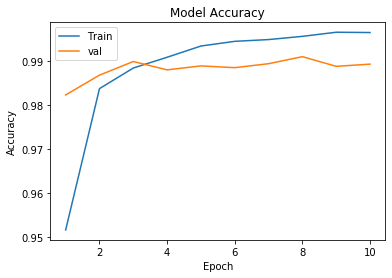

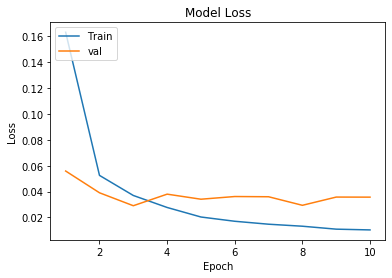

In [35]:
learning_curve(history, 10)